# $ \text{One Factor Dependent Samples ANOVA} $

##### $ G = \text{sum of all scores} $
##### $ N = \text{number of scores} $
##### $ T_i = \text{sum of scores in treatment i} $
##### $ k = \text{number of treatments/number of cells} $
#### $ n = \text{number of subjects}$
#### $ P_i = \text{sum of scores for person/participant/observational unit i} $

# $ F = \frac{S^2_{between-treatments}}{S^2_{error}} $

## $ s^2 = \frac{SS_{type_i}}{df_{type_i}} $

## $ SS_{total} = \sum{X^2} - \frac{G^2}{N} $

### $ df_{total} = N-1 $

## $ SS_{between-treatments} = \sum{\frac{T^2_i}{n_i}} - \frac{G^2}{N} = SS_{total} - SS_{within-treatments}$

### $ df_{between-treatments} = k -1 = df_{total} - df_{within-treatments} $

## $ SS_{within-treatments} = \sum{SS_{T_i}...SS_{T_k}} = SS_{total} - SS_{between-treatments} $

### $ df_{within-treatments} = N - k = \sum{df_{T_i}...df_{T_k}} $

## $ SS_{between-subjects} = \sum{\frac{P_i^2}{k}} - \frac{G^2}{N} $

### $ df_{between-subjects} = n - 1 $

## $ SS_{error} = SS_{within-treatments} - SS_{between-subjects} $

### $ df_{error} = df_{within-treatments} - df_{between-subjects} $


F ratio: 794.53741

Sample 1: [120, 100, 90, 100, 110, 100, 70, 100, 100, 110, 90, 80, 100, 100, 110, 100, 80, 100, 100, 100, 110, 100, 90, 120, 120, 100, 80, 100, 70, 90, 90, 100, 100, 90, 90, 100, 100, 90, 90, 100, 100, 110, 100, 110, 100, 110, 90, 80, 100, 90]

Sample 2: [60, 80, 70, 80, 70, 70, 80, 60, 70, 70, 60, 80, 80, 70, 70, 90, 60, 70, 70, 70, 70, 60, 60, 70, 80, 70, 60, 70, 80, 70, 70, 70, 80, 50, 70, 80, 60, 70, 60, 80, 80, 60, 70, 90, 80, 60, 60, 80, 50, 70]

Sample 3: [10, 40, 20, 20, 10, 20, 0, 30, 10, 30, 10, 10, 30, 30, 20, 20, 20, 30, 20, 20, 30, 20, 20, 10, 10, 20, 40, 20, 20, 10, 10, 20, 30, 10, 30, 20, 20, 0, 30, 10, 20, 20, 40, 20, 10, 20, 20, 30, 20, 10]

SS Between Treatments: 155729.33333333337 df: 2

SS Within Treatments: 14508.0 df: 147

SS Error: 9603.999999999884 df: 98

Between Treatments Variance: 77864.66666666669
Error Variance: 97.9999999999988


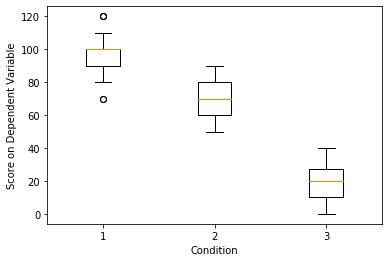

Eta Squared =  0.9419112903225814


In [3]:
# one factor dependent samples ANOVA

import statistics as stats
import scipy
import scipy.stats
import random
import numpy as np
import matplotlib.pyplot as plt

# generating sample data

sample1 = []
sample2 = []
sample3 = []

for i in range(50):
    sample1.append(10* round(np.random.randn()) + 100)
    sample2.append(10* round(np.random.randn()) + 70)
    sample3.append(10* round(np.random.randn()) + 20)
    
# calculating the df

k = 3

if len(sample1) == len(sample2) and len(sample2) == len(sample3):
    n = len(sample1)
    
N = len(sample1) + len(sample2) + len(sample3)
df_total = N-1
df_within_treatments = N - k
df_between_treatments = k-1
df_between_subjects = n-1
df_error = df_within_treatments - df_between_subjects

# calculating the total sum of squares

x_sq = []
count = 0
for i in sample1:
    x_sq.append(sample1[count]**2)
    count = count+1
    
count = 0
for i in sample2:
    x_sq.append(sample2[count]**2)
    count = count+1
    
count = 0
for i in sample3:
    x_sq.append(sample3[count]**2)
    count=count+1
    
sum_x_sq = sum(x_sq)

G = sum(sample1) + sum(sample2) + sum(sample3)

SS_total = sum_x_sq - G**2/N

# calculating the between treatments sum of squares

total_sample1 = sum(sample1)
total_sample2 = sum(sample2)
total_sample3 = sum(sample3)

SS_between_treatments = (((total_sample1**2/len(sample1)) + (total_sample2**2/len(sample2)) + (total_sample3**2/len(sample3))) - G**2/N)

# calculating the within treatments sum of squares

sqs_sample1 = []

count=0
for i in sample1:
    sqs_sample1.append(sample1[count]**2)
    count = count+1

SS_sample1 = sum(sqs_sample1) - sum(sample1)**2/len(sample1)

sqs_sample2 = []

count=0
for i in sample2:
    sqs_sample2.append(sample2[count]**2)
    count = count+1

SS_sample2 = sum(sqs_sample2) - sum(sample2)**2/len(sample2)

sqs_sample3 = []

count=0
for i in sample3:
    sqs_sample3.append(sample3[count]**2)
    count = count+1

SS_sample3 = sum(sqs_sample3) - sum(sample3)**2/len(sample3)

SS_within_treatments = SS_sample1 + SS_sample2 + SS_sample3

# calculating the between subjects sum of squares

P_sq = []

count = 0
for i in sample1:
    P_sq.append(sample1[count] + sample2[count] + sample3[count])
    P_sq[count] = P_sq[count]**2/k
    count = count + 1
    
sum_P_sq_over_k = sum(P_sq)

SS_between_subjects = sum_P_sq_over_k - G**2/N

# calculating the error variance

SS_error = SS_within_treatments - SS_between_subjects
df_error = df_within_treatments - df_between_subjects

s_sq_error = SS_error/df_error

# calculating the between treatments variance

s_sq_between_treatments = SS_between_treatments/df_between_treatments

# calculating the F ratio

F_ratio = s_sq_between_treatments/s_sq_error


print('F ratio:', round(F_ratio,5))

print()

print('Sample 1:', sample1)
print()
print('Sample 2:', sample2)
print()
print('Sample 3:', sample3)
print()
print('SS Between Treatments:', SS_between_treatments, 'df:', df_between_treatments)
print()
print('SS Within Treatments:', SS_within_treatments, 'df:', df_within_treatments)
print()
print('SS Error:', SS_error, 'df:', df_error)
print()
print('Between Treatments Variance:', s_sq_between_treatments)
print('Error Variance:', s_sq_error)


    
# plotting a boxplot of the data

plt.boxplot([sample1,sample2,sample3])
plt.xlabel('Condition')
plt.ylabel('Score on Dependent Variable')
plt.show()

# calculating effect size

eta_squared = SS_between_treatments/(SS_between_treatments + SS_error)

print('Eta Squared = ', eta_squared)

